# WNTR Additional Examples
Here, we will have a few more advanced examples using WNTR focusing on modifying settings and analyzing results:

1. Basic example
2. Basic data processing
3. Loops

TODO: 💡

## Imports
Install and import WNTR and additional Python packages that are needed for the tutorial
- Numpy is required to define comparison operators (i.e., np.greater) in queries
- Matplotlib is required to create graphics

In [1]:
# Install required packages if not already available
try:
    import wntr
except ImportError:
    !pip install wntr
    import wntr  # import again after installation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Units
WNTR uses **SI (International System) units (length in meters, time in seconds, mass in kilograms)**.  See https://usepa.github.io/WNTR/units.html for more details.

# Basic example

Recall: basics steps:
1. set pat of the .inp file
2. initialize wntr model
3. run simulation
4. get results

In [3]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('networks/Net3.inp')

In [4]:
# Simulate hydraulics using EPANET
sim = wntr.sim.EpanetSimulator(wn)
results_EPANET = sim.run_sim()

Simulation results are stored in an object which includes a dictionary of DataFrames for nodes and a dictionary of DataFrames for links.  Each DataFrame is indexed by time (in seconds) and the columns are node or link names.

In [5]:
# Print available node results
results_EPANET.node.keys()

dict_keys(['demand', 'head', 'pressure', 'quality'])

In [6]:
# Print available link results
results_EPANET.link.keys()

dict_keys(['quality', 'flowrate', 'velocity', 'headloss', 'status', 'setting', 'friction_factor', 'reaction_rate'])

In [7]:
# View EpanetSimulator pressure results
results_EPANET.node['pressure'].head()

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,-0.450070,28.593657,8.839204,40.612469,3.992880,7.162800,63.706444,92.187874,92.187874,31.553928,...,38.151543,44.650841,42.623016,40.477558,39.655293,0.0,0.0,3.992880,7.162800,8.839199
3600,28.253721,28.887156,9.099179,41.513771,4.191203,6.752899,63.751488,92.490318,92.490318,39.867870,...,39.722370,45.767307,43.530823,41.041176,40.189754,0.0,0.0,4.191203,6.752899,9.099170
7200,28.764309,30.003231,9.450786,42.429108,4.620553,6.369764,63.793495,92.773643,92.773643,41.517067,...,40.730850,46.730705,44.450729,41.956635,41.098701,0.0,0.0,4.620553,6.369764,9.450771
10800,28.871420,30.415579,9.869709,42.817181,5.158957,6.534997,63.813141,92.906601,92.906601,41.862659,...,41.116528,47.115646,44.837078,42.284969,41.419266,0.0,0.0,5.158957,6.534997,9.869695
14400,29.659281,31.970745,10.284730,44.297886,5.665973,6.740044,63.877914,93.346977,93.346977,44.400757,...,42.755901,48.670105,46.327477,43.938866,43.075676,0.0,0.0,5.665973,6.740044,10.284711


In [8]:
# View EpanetSimulator flow results
results_EPANET.link['flowrate'].head()

name,20,40,50,60,101,103,105,107,109,111,...,317,319,321,323,325,329,330,333,10,335
0,-0.141719,-0.029042,0.020770,0.830133,6.040704e-09,0.010603,-0.026661,0.002038,-0.000658,-0.020221,...,0.007019,-0.000032,0.476306,-0.005008,0.009100,0.830133,0.0,-3.219251e-08,0.000000,0.830133
3600,-0.191671,-0.062873,0.019414,0.824086,2.167272e-01,0.116475,0.077004,0.026062,0.100172,0.071849,...,0.007523,0.004533,0.488297,0.010440,0.013403,0.824086,0.0,-3.219251e-08,0.216727,0.824086
7200,-0.228370,-0.078843,-0.008372,0.818413,2.101061e-01,0.112424,0.080186,0.025750,0.100154,0.078840,...,0.007631,0.006129,0.492515,0.015747,0.014157,0.818413,0.0,-3.219251e-08,0.210106,0.818413
10800,-0.226241,-0.074246,-0.010390,0.815749,2.086967e-01,0.111710,0.079729,0.025627,0.099609,0.078586,...,0.007760,0.006157,0.492931,0.016104,0.014133,0.815749,0.0,-3.219251e-08,0.208697,0.815749
14400,-0.283993,-0.100968,-0.035917,0.806910,1.980931e-01,0.105608,0.083378,0.025560,0.099221,0.088126,...,0.007718,0.004612,0.488854,0.015815,0.015187,0.806910,0.0,-3.219251e-08,0.198093,0.806910


In [9]:
# get pressure at specific node
results_EPANET.node['pressure'].loc[:,'20'] 

0          8.839204
3600       9.099179
7200       9.450786
10800      9.869709
14400     10.284730
            ...    
590400     9.350327
594000     9.165747
597600     9.179482
601200     9.379585
604800     9.486569
Name: 20, Length: 169, dtype: float32

In [14]:
results_pressure = results_EPANET.node['pressure'].loc[:,'20'] 
time_hours = results_pressure.index/3600 
time_hours

Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
       ...
       159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0],
      dtype='float64', length=169)

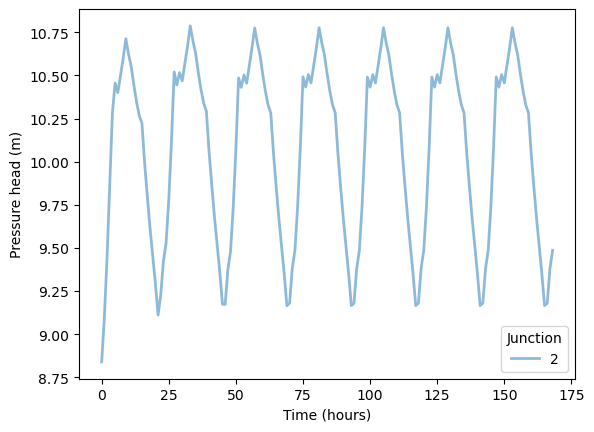

In [17]:
# plot using matplotlib
# pressure junction '20'
# -----------------------------------------------------
results_pressure = results_EPANET.node['pressure'].loc[:,'20'] 
time_hours = results_pressure.index / 3600
plt.plot( time_hours, results_pressure , linewidth=2, alpha=0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Pressure head (m)')
plt.legend('20', title='Junction', loc='best')
plt.savefig('0_pressure.png', dpi = 400)
plt.show()


In [18]:
results_flow = results_EPANET.link['flowrate'].loc[:,'50'] 

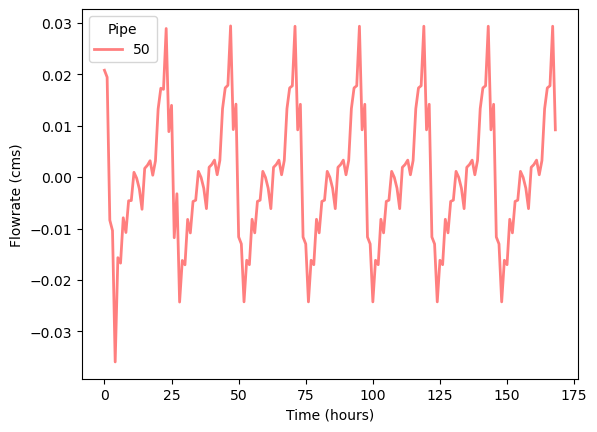

In [22]:
# plot using matplotlib
# flow rate pipe '50'
# -----------------------------------------------------
results_flow = results_EPANET.link['flowrate'].loc[:,'50'] 
plt.plot( time_hours , results_flow, color = 'red', linewidth = 2, alpha = 0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Flowrate (cms)')
plt.legend(['50'], title='Pipe', loc='best')
plt.savefig('0_flow.png', dpi = 400)
plt.show()

**Let's plot pressures for two nodes on the same plot**

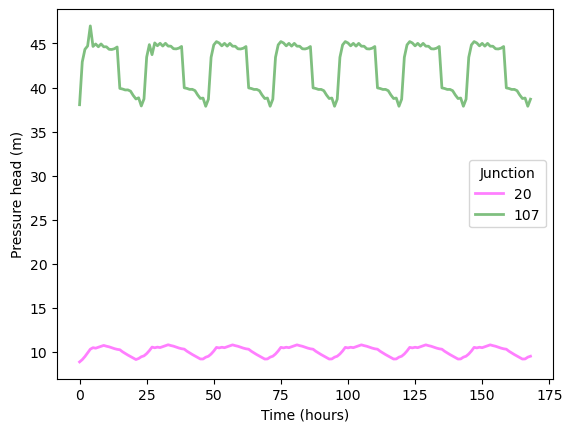

In [24]:
# pressures at junctions 20 and 107
# -----------------------------------------------------
results_pressure = results_EPANET.node['pressure'].loc[:,'20'] 
plt.plot(time_hours,  results_pressure,  color = 'magenta', linewidth=2, alpha=0.5)

results_pressure = results_EPANET.node['pressure'].loc[:,'107'] 
plt.plot(time_hours, results_pressure,  color = 'green', linewidth=2, alpha=0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Pressure head (m)')
plt.legend(['20','107'], title='Junction', loc='best')
plt.show()

# Basic data processing
In this example, you will:
1. Generate a time-series plot showing  pump flow rate and the tank water level.
2. Plot the tank water level highlighting when it exceeds a chosen threshold and report how many times this occurs.
3. Plot the pump’s ON/OFF status over time and report how many times the pump turns ON.

You will learn how to reference elements in a more general way, which is especially useful for automating simulations and writing adaptable, reusable code.

## Part 1 - plot pump and tank

In [25]:
# Import .inp and run simulation
inp = 'networks/Net3.inp'
wn = wntr.network.WaterNetworkModel(inp)
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

**Let's start with the pumps**

In [26]:
# get pump list
print("Pump names", wn.pump_name_list)

Pump names ['10', '335']


In [27]:
# let's define unit conversion so we can display results in gpm
units = 15850.3 # cms to gpm

In [28]:
# select pump based on it's ID
pump = wn.get_link('10')
print(pump)    # recall this will print the name of the pump
pump           # recall this will print the variable with all its attributes which is useful when developing the code

10


<Pump '10' from 'Lake' to '10', pump_type='HEAD', pump_curve=1, speed=<TimeSeries: base_value=1.0, pattern_name=None, category='None'>, status=Closed>

In [40]:
# often times we would like to automate our code and use indexes instead of names (we will see a few examples later)
# this will produce the same result as above but using index instead of name

# select pump index
i = 1
wn.pump_name_list[i]

'335'

In [41]:
pump = wn.get_link(wn.pump_name_list[i])
pump

<Pump '335' from '60' to '61', pump_type='HEAD', pump_curve=2, speed=<TimeSeries: base_value=1.0, pattern_name=None, category='None'>, status=Open>

In [42]:
# get pump flow 
#---------------------------------------------------------
# note how we are getting pump results by using the variable

results_pump = results.link['flowrate']['335']*units # this gives pump flowrate, but we have to manualy specify pump name

results_pump = results.link['flowrate'][pump.name]*units # this gives pump flowrate but without having to manualy specify the pump

results_pump

0         13157.856445
3600      13062.013672
7200      12972.099609
10800     12929.859375
14400     12789.766602
              ...     
590400        0.000000
594000        0.000000
597600    13195.483398
601200    13209.923828
604800    13091.001953
Name: 335, Length: 169, dtype: float32

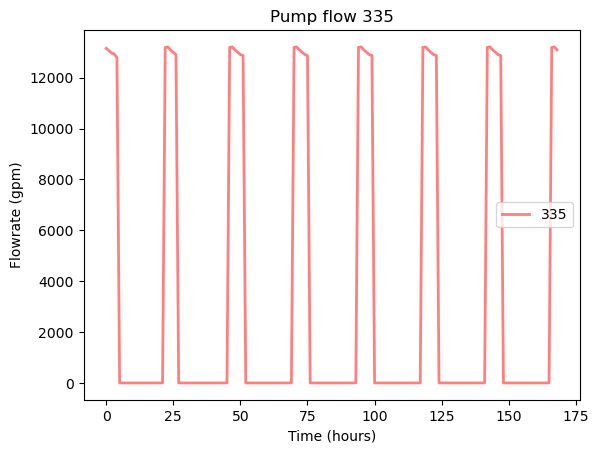

In [43]:
# plot
#---------------------------------------------------------
time_hours = results_pump.index / 3600  # Convert seconds to hours
plt.plot(time_hours, results_pump, color = 'red', linewidth = 2, alpha = 0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Flowrate (gpm)')
plt.legend([pump.name], loc='best')   # this also allows make general and reusable figure legend, titles
plt.title('Pump flow ' + pump.name)
plt.show()

**Let's do the same for tanks**


In [44]:
# get tank list
print('Tank names', wn.tank_name_list)

Tank names ['1', '2', '3']


In [45]:
# select a tank
i = 0
tank = wn.get_node(wn.tank_name_list[i])
tank

<Tank '1', elevation=40.203120000000006, min_level=0.030480000000000004, max_level=9.784080000000001, diameter=25.908, min_vol=0.0, vol_curve='None'>

Text(0.5, 1.0, 'Tank water level 1')

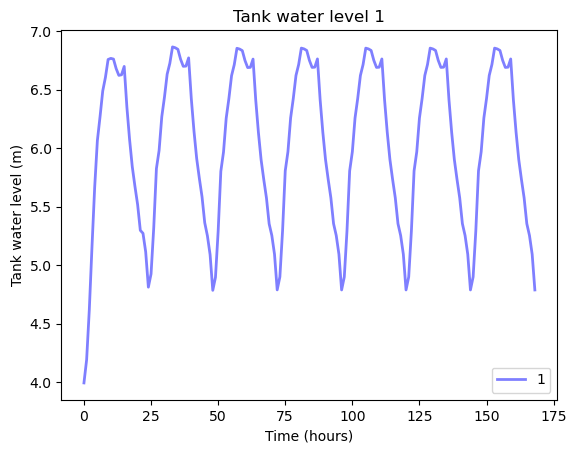

In [46]:
# get tank water level and plot

results_tank = results.node['pressure'][tank.name]

plt.plot(time_hours, results_tank, color = 'blue', linewidth = 2, alpha = 0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Tank water level (m)')
plt.legend([tank.name], loc='best') 
plt.title('Tank water level ' + tank.name)

## Part 2 - tank performance
Plot the tank water level highlighting when it exceeds a chosen threshold and report how many times this occurs.

In [48]:
results_tank = results.node['pressure'][tank.name]
results_tank

0         3.992880
3600      4.191203
7200      4.620553
10800     5.158957
14400     5.665973
            ...   
590400    5.574681
594000    5.354136
597600    5.252803
601200    5.092208
604800    4.787603
Name: 1, Length: 169, dtype: float32

In [51]:
# set threshold
tank_thr = 5.5
# get when tank water level is greater than the threshold
I = results_tank > tank_thr
print(I)

0         False
3600      False
7200      False
10800     False
14400      True
          ...  
590400     True
594000    False
597600    False
601200    False
604800    False
Name: 1, Length: 169, dtype: bool


In [52]:
# get the number of times tank level is above threshold
sum(I)

125

Python treats `True` and `False` as numbers (`True == 1` and `False == 0`) that's why `sum(I)` gives you the number of times the condition is true

In [53]:
# print it nicely

print(f'Number of time steps the tank is above {tank_thr} m is = {sum(I)}')

Number of time steps the tank is above 5.5 m is = 125


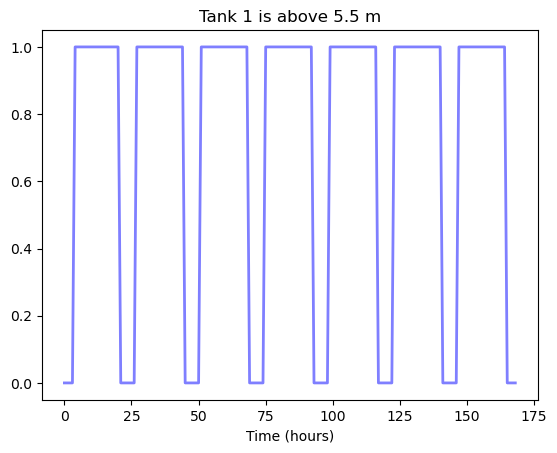

In [55]:
# plot

plt.plot(time_hours, I, color='blue', linewidth = 2, alpha = 0.5)
plt.title(f'Tank {tank.name} is above {tank_thr} m')
plt.xlabel('Time (hours)')
plt.show()

Change the threshold see that the result makes sense:

higher threshold -> fewer occurances

lower thresshold -> more occrances


## Part 3 - pump performance
Plot the pump’s ON/OFF status over time and report how many times the pump turns ON.

In [56]:
# get when tank water level is greater than the threshold
I = results_pump > 0 
print(I)

0          True
3600       True
7200       True
10800      True
14400      True
          ...  
590400    False
594000    False
597600     True
601200     True
604800     True
Name: 335, Length: 169, dtype: bool


In [57]:
# print it nicely

print(f'Number of time steps the pump is ON = {sum(I)}')

Number of time steps the pump is ON = 43


In [58]:
print(f'Number of time steps the pump is OFF = {sum(~I)}')

Number of time steps the pump is OFF = 126


In [60]:
# OR

print(f'Number of time steps the pump is OFF = {len(I) - sum(I)}')

Number of time steps the pump is OFF = 126


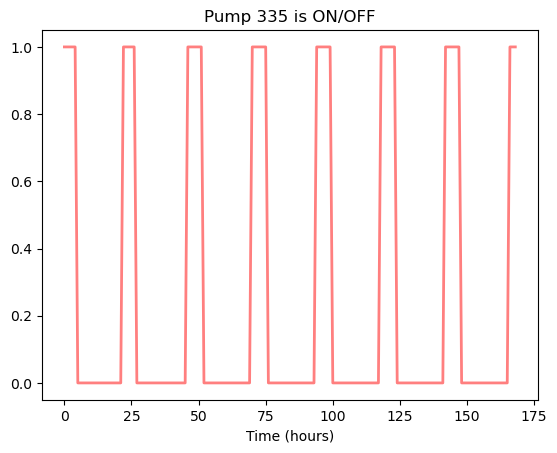

In [61]:
# plot

plt.plot(time_hours, I, color='red', linewidth = 2, alpha = 0.5)
plt.title(f'Pump {pump.name} is ON/OFF')
plt.xlabel('Time (hours)')
plt.show()

## Let's plot two results on the same plot

In [ ]:
# 7.5
tank_thr = 💡
# get when tank water level is greater than the threshold
I = results_tank > tank_thr
plt.plot(time_hours, I, color='blue', linewidth = 2, alpha = 0.5)

# 8.5
tank_thr = 💡
# get when tank water level is greater than the threshold
I = results_tank > tank_thr
plt.plot(time_hours, I, color='red', linewidth = 2, alpha = 0.5)
plt.xlabel('Time (hours)')
plt.legend(['7.5','8.5'], loc='best')  
plt.title(f'Tank performance')
plt.show()


# Loops
We often need to loop over multiple elements to modify network components or run stochastic simulations. In this example, we'll loop over all junctions and get the base demand. You can then use similar approach and tailor it to your specific task.

In [63]:
# first let's revisit a simple loop. you've already seen this in previous lectures
# we can loop using range 

for i in range(8):
        print(i)

0
1
2
3
4
5
6
7


In [64]:
# we can adjust start, and step size
for i in range(20, 7,-2):
        print(i)

20
18
16
14
12
10
8


Now, let's apply same concept to get demands for multiple junctions. 
* let's recall how to do get demand for a single junction
* then we'll automate by looping over multiple junctions

In [65]:
# get junction names
node_names = wn.junction_name_list 
print(node_names)

['10', '15', '20', '35', '40', '50', '60', '601', '61', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '120', '121', '123', '125', '127', '129', '131', '139', '141', '143', '145', '147', '149', '151', '153', '157', '159', '161', '163', '164', '166', '167', '169', '171', '173', '177', '179', '181', '183', '184', '185', '187', '189', '191', '193', '195', '197', '199', '201', '203', '204', '205', '206', '207', '208', '209', '211', '213', '215', '217', '219', '225', '229', '231', '237', '239', '241', '243', '247', '249', '251', '253', '255', '257', '259', '261', '263', '265', '267', '269', '271', '273', '275']


In [67]:
# get choose specific junction

# let's use junction 15 as an example

i = node_names.index('15') # find the index of '109'
print(i)

1


In [74]:
i = 10

temp_node = wn.get_node(node_names[i])
temp_node

<Junction '103', elevation=13.1064, demand_timeseries_list=<Demands: [<TimeSeries: base_value=0.00840361416048, pattern_name='1', category='None'>]>>

In [75]:
base_demand = temp_node.demand_timeseries_list[0].base_value 
base_demand

0.00840361416048

In [76]:
print('Node ID: ' , temp_node.name, '; Base demand = ', base_demand)

Node ID:  103 ; Base demand =  0.00840361416048


In [77]:
# loop over first three junctions
for i in range (3):
    temp_node = wn.get_node(node_names[i])
    base_demand = temp_node.demand_timeseries_list[0].base_value
    print('Node ID: ' , temp_node, '; Base demand = ', base_demand)

#    for i in range (len(node_names)):

Node ID:  10 ; Base demand =  0.0
Node ID:  15 ; Base demand =  6.30901964e-05
Node ID:  20 ; Base demand =  0.0


In [78]:
# loop over all junctions
for i in range (len(node_names)):
    temp_node = wn.get_node(node_names[i])
    base_demand = temp_node.demand_timeseries_list[0].base_value
    print('Node ID: ' , temp_node, '; Base demand = ', base_demand)

Node ID:  10 ; Base demand =  0.0
Node ID:  15 ; Base demand =  6.30901964e-05
Node ID:  20 ; Base demand =  0.0
Node ID:  35 ; Base demand =  6.30901964e-05
Node ID:  40 ; Base demand =  0.0
Node ID:  50 ; Base demand =  0.0
Node ID:  60 ; Base demand =  0.0
Node ID:  601 ; Base demand =  0.0
Node ID:  61 ; Base demand =  0.0
Node ID:  101 ; Base demand =  0.01198398280618
Node ID:  103 ; Base demand =  0.00840361416048
Node ID:  105 ; Base demand =  0.008540519886668001
Node ID:  107 ; Base demand =  0.003447248331296
Node ID:  109 ; Base demand =  0.014599071446960002
Node ID:  111 ; Base demand =  0.008955022477016
Node ID:  113 ; Base demand =  0.001262434829964
Node ID:  115 ; Base demand =  0.00328699923244
Node ID:  117 ; Base demand =  0.007426347018244
Node ID:  119 ; Base demand =  0.011112076291932
Node ID:  120 ; Base demand =  0.0
Node ID:  121 ; Base demand =  0.002626444876132
Node ID:  123 ; Base demand =  6.30901964e-05
Node ID:  125 ; Base demand =  0.00287691295584
